In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt, pow
import matplotlib.pyplot as plt

In [5]:

class KNN:
    def __init__(self, filename, k, h=1, distance_function='eucledian', kernel='uniform'):
        self.filename = filename
        self.k = k
        self.h = h
        self.data = np.array(pd.read_csv(self.filename))
        self.X = self.data[:, :-1]
        self.Y = self.data[:, -1]
        self.X_train = []
        self.Y_train = []
        self.X_test = []
        self.Y_test = []
        self.predictions = {'k': [], 'h': []}
        self.distance_function = distance_function
        self.kernel_function = kernel

    def __fit__(self):
        # Todo: Change the Splitting Logic as per LOOC
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=0.33,
                                                                                random_state=42)

    def calculate_eucledian_distance_from_a_point(self, test_value):
        distances = []

        for i in self.X_train:
            distance = 0
            for column in range(len(test_value)):
                distance += pow(i[column] - test_value[column], 2)
            distances.append(sqrt(distance))

        return distances

    def calculate_manhattan_distance_from_a_point(self, test_value):
        distances = []

        for i in self.X_train:
            distance = 0
            for column in range(len(test_value)):
                distance += abs(i[column] - test_value[column])
            distances.append(distance)

        return distances

    def calculate_cosine_distance_from_a_point(self, test_value):
        distances = []

        for i in self.X_train:
            distance = 0
            for column in range(len(test_value)):
                distance += abs(i[column] - test_value[column])
            distances.append(distance)

        return distances
    
    
    def __apply_kernel(self, distance):
        if self.kernel_function == 'epanechnikov':
            kernel_value = (3/4) * (1 - distance**2) if distance <= 1 else 0
        elif self.kernel_function == 'quadratic':
            kernel_value = (15/16) * (1 - distance**2)**2 if distance <= 1 else 0
        else:
            kernel_value = 1/2 if distance <= 1 else 0
            
        return kernel_value
    

    def __get_prediction_based_on_k_neighbours__(self, distances):
        min_indexes = np.argpartition(np.array(distances), self.k)[:self.k:]
        output = {}
        for index in min_indexes:
            op = self.Y_train[index]
            if op in output:
                output[op] += 1
            else:
                output[op] = 1

        sorted_output = sorted(output.items(), key=lambda kv: kv[1])
        return sorted_output[0][0]

    def __get_prediction_based_on_parsion_window(self, distances):
        distances = np.array(distances)
        windowed_values_indexes = np.argwhere(distances <= self.h)
        windowed_values_indexes = windowed_values_indexes[:, 0]
        output = {}
        for index in windowed_values_indexes:
            op = self.Y_train[index]
            if op in output:
                output[op] += self.__apply_kernel(distances[index])
            else:
                output[op] = self.__apply_kernel(distances[index])
        sorted_output = sorted(output.items(), key=lambda kv: kv[1])
        return sorted_output[0][0]

    def __predict__(self):
        distances = []
        for x in range(len(self.X_test)):
            if self.distance_function == 'eucledian':
                distances.append(self.calculate_eucledian_distance_from_a_point(self.X_test[x]))
            if self.distance_function == 'manhatten':
                distances.append(self.calculate_eucledian_distance_from_a_point(self.X_test[x]))
            if self.distance_function == 'cosine':
                distances.append(self.calculate_cosine_distance_from_a_point(self.X_test[x]))

        for distance in distances:
            self.predictions['k'].append(self.__get_prediction_based_on_k_neighbours__(distance))
            self.predictions['h'].append(self.__get_prediction_based_on_parsion_window(distance))

    def accuracy(self):
        correct_h = 0
        correct_k = 0
        for x in range(len(self.Y_test)):
            if self.predictions['k'][x] == self.Y_test[x]:
                correct_k = correct_k + 1
            if self.predictions['h'][x] == self.Y_test[x]:
                correct_h = correct_h + 1

        accuracy_k = (correct_k / float(len(self.Y_test)) * 100)
        accuracy_h = (correct_h / float(len(self.Y_test)) * 100)
        return accuracy_k, accuracy_h




In [6]:
# Create a empty dictonary
final_output = {'h' : [] , 'k' : []}

In [7]:
knn = KNN('knn-iris.csv', 2, kernel='quadratic')
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))

final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 98.0, Accuracy of H: 54.0


In [8]:
knn = KNN('knn-iris.csv', 3, kernel='epanechnikov')
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 94.0, Accuracy of H: 54.0


In [9]:
knn = KNN('knn-iris.csv', 4)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 86.0, Accuracy of H: 54.0


In [10]:
knn = KNN('knn-iris.csv', 5)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 86.0, Accuracy of H: 54.0


In [11]:
knn = KNN('knn-iris.csv', 6)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 84.0, Accuracy of H: 54.0


In [12]:
knn = KNN('knn-iris.csv', 7)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 82.0, Accuracy of H: 54.0


In [13]:
knn = KNN('knn-iris.csv', 8)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 76.0, Accuracy of H: 54.0


In [14]:
knn = KNN('knn-iris.csv', 9)
knn.__fit__()
knn.__predict__()
(k,h) = knn.accuracy()
print('Accuracy of K: {}, Accuracy of H: {}'.format(k,h))
final_output['h'].append(h)
final_output['k'].append(k)

Accuracy of K: 72.0, Accuracy of H: 54.0


In [15]:
final_output_df = pd.DataFrame(final_output)

In [16]:
final_output_df

,h,k
0,54.0,98.0
1,54.0,94.0
2,54.0,86.0
3,54.0,86.0
4,54.0,84.0
5,54.0,82.0
6,54.0,76.0
7,54.0,72.0


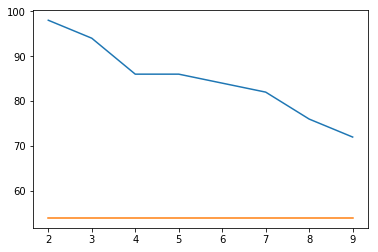

In [17]:
fig, ax = plt.subplots()
ax.plot([2,3,4,5,6,7,8,9],final_output_df['k'])
#ax.plot(final_output_df['h'], label='Parsing Window')
ax.plot([2,3,4,5,6,7,8,9],final_output_df['h'])
plt.show()